In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import networkx as nx
import random
import pickle
import itertools
import math
import urllib.request as urllib
import io
import zipfile
import community as community_louvain
import matplotlib.cm as cm

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.linalg import diag
from tensorflow.keras import callbacks
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from networkx.generators.community import LFR_benchmark_graph
from itertools import count
from scipy.spatial import distance_matrix
from sklearn.decomposition import NMF
from rdyn import RDyn

from helpers import *
from Autoencoder import *

In [2]:
graphlist = pickle.load(open('graphs/thiers_day_19.p', 'rb'))

In [23]:
#DAY 19, SNAPSHOT 1
t1 = graphlist[0]
A = create_adjacency_matrix(t1)
t1_A = tf.convert_to_tensor(create_adjacency_matrix(t1).astype('float32'))
t1_B = tf.convert_to_tensor(nx.modularity_matrix(t1).astype('float32'))

In [4]:
create_degree_matrix(t1_A)

array([[2., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [99]:
t1_model_1 = Autoencoder(174, 128, k_reg=tf.keras.regularizers.L2(), act_reg=SparseRegularizer())
t1_model_1_history = train(t1_model_1, 100, 174, t1_B)

H_1 = t1_model_1.encoder(t1_B)
t1_model_2 = Autoencoder(128, 64, k_reg=tf.keras.regularizers.L2(), act_reg=SparseRegularizer())
t1_model_2_history = train(t1_model_2, 100, 128, H_1)

H_2 = t1_model_2.encoder(H_1)
t1_model_3 = Autoencoder(64, 32, k_reg=tf.keras.regularizers.L2(), act_reg=SparseRegularizer())
t1_model_3_history = train(t1_model_3, 100, 64, H_2)

H_3 = t1_model_3.encoder(H_2)

In [29]:
#try sharing weights
t1_model_1_v2 = Autoencoder(174, 128, k_reg=tf.keras.regularizers.L2(), act_reg=SparseRegularizer())
temp = t1_model_1_v2.predict(t1_B)
t1_model_1_v2.history = {}
t1_model_1_v2.set_weights(t1_model_1.get_weights())
t1model1v2_history = train(t1_model_1_v2, 1000, 1000, t1_A)

In [101]:
labels = graph_labels(t1)
kmeans = KMeans(n_clusters=5, n_init=20).fit(H_3)

normalized_mutual_info_score(labels, kmeans.labels_)

0.1381930822019302

In [105]:
partition = community_louvain.best_partition(t1)

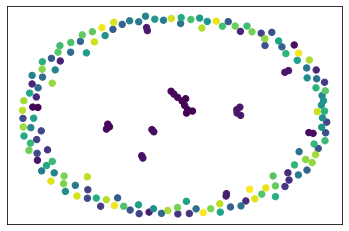

In [109]:
# draw the graph
pos = nx.spring_layout(t1)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(t1, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(t1, pos, alpha=0.5)
plt.show()